In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

xrange = (0,10)

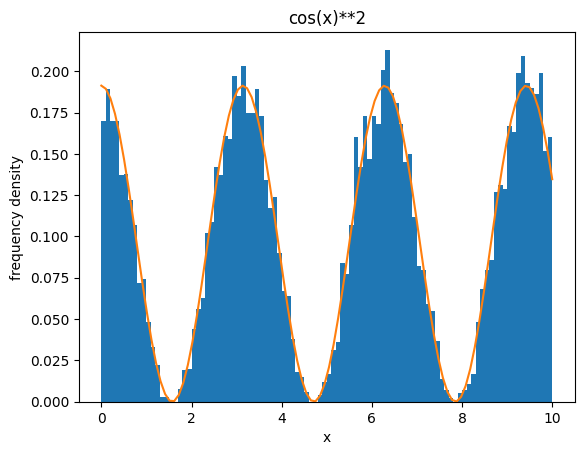

In [2]:
#function of interest
def func(x):
    return np.cos(x)**2

#'normalise' for the range we're looking at
normalization_factor, error = quad(func, *xrange)

def pdf(x):
    return func(x)/normalization_factor


# get the max-value in y
from scipy.optimize import brute
f = lambda x: -pdf(x)
x = brute(f, [xrange])
ymax = -f( x[0] )

#algo
def gen_accept_reject(size=1):
    res = []
    while len(res)<size:
        a = np.random.uniform(*xrange)
        b = np.random.uniform(0,ymax)
        y = pdf(a)
        if y > ymax:
            print('Some issue: as y larger than ymax')
        if b <= y:
            res.append(a)
    return res


#plot results
v=gen_accept_reject(10000)
x_ax=np.linspace(*xrange,100)
plt.hist(v, range=xrange, bins=100, density=True)
plt.plot(x_ax,pdf(x_ax))
plt.xlabel("x")
plt.ylabel("frequency density")
plt.title("cos(x)**2")
plt.show()

[7.06861637]
0.16032897290968856


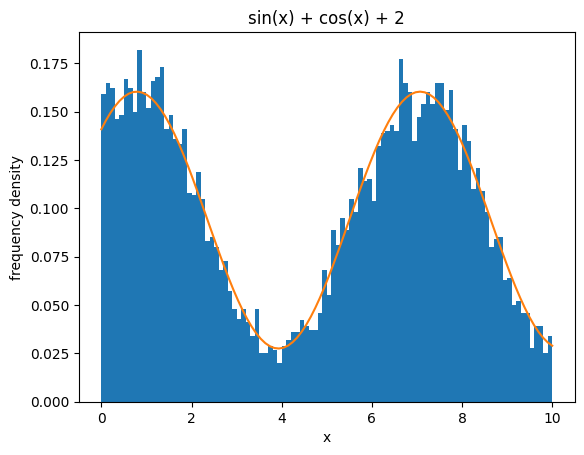

In [17]:
#function of interest
def func(x):
    return np.sin(x) + np.cos(x) + 2

#'normalise' for the range we're looking at
normalization_factor, error = quad(func, *xrange)

def pdf(x):
    return func(x)/normalization_factor


# get the max-value in y
from scipy.optimize import brute
f = lambda x: -pdf(x)
x = brute(f, [xrange])
print(x)
ymax = -f( x[0] )
print(ymax)

#algo
def gen_accept_reject(size=1):
    res = []
    while len(res)<size:
        a = np.random.uniform(*xrange)
        b = np.random.uniform(0,ymax)
        y = pdf(a)
        if y > ymax:
            print('Some issue: as y larger than ymax')
        if b <= y:
            res.append(a)
    return res


#plot results
v=gen_accept_reject(10000)
x_ax=np.linspace(*xrange,100)
plt.hist(v, range=xrange, bins=100, density=True)
plt.plot(x_ax,pdf(x_ax))
plt.xlabel("x")
plt.ylabel("frequency density")
plt.title("sin(x) + cos(x) + 2")
plt.show()

[-6.28320312]
1.9188526392041256


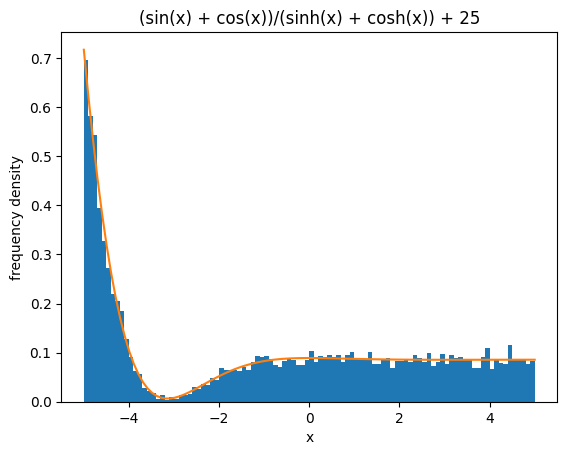

In [18]:
xrange=(-5,5)
#function of interest
def func(x):
    return (np.sin(x) + np.cos(x))/(np.sinh(x) + np.cosh(x)) + 25

#'normalise' for the range we're looking at
normalization_factor, error = quad(func, *xrange)

def pdf(x):
    return func(x)/normalization_factor


# get the max-value in y
from scipy.optimize import brute
f = lambda x: -pdf(x)
x = brute(f, [xrange])
print(x)
ymax = -f( x[0] )
print(ymax)

#algo
def gen_accept_reject(size=1):
    res = []
    while len(res)<size:
        a = np.random.uniform(*xrange)
        b = np.random.uniform(0,ymax)
        y = pdf(a)
        if y > ymax:
            print('Some issue: as y larger than ymax')
        if b <= y:
            res.append(a)
    return res


#plot results
v=gen_accept_reject(10000)
x_ax=np.linspace(*xrange,100)
plt.hist(v, range=xrange, bins=100, density=True)
plt.plot(x_ax,pdf(x_ax))
plt.xlabel("x")
plt.ylabel("frequency density")
plt.title("(sin(x) + cos(x))/(sinh(x) + cosh(x)) + 25")
plt.show()

Standard Normal 

[-2.22044605e-16]
0.39894250911642737


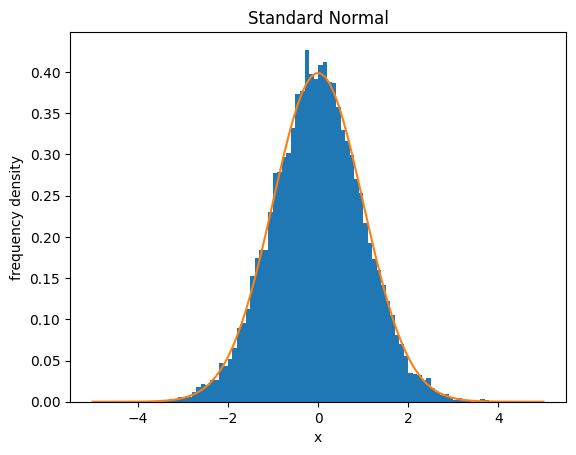

0.2494574300895552


In [ ]:
gen_range=(-5,5)
#function of interest
def func(x):
    return (2*np.pi)**(-0.5) * np.exp( -x**2 /2 )

#'normalise' for the range we're looking at
normalization_factor, error = quad(func, *gen_range)

def pdf(x):
    return func(x)/normalization_factor


# get the max-value in y
from scipy.optimize import brute
f = lambda x: -pdf(x)
x = brute(f, [gen_range])
print(x)
ymax = -f( x[0] )
print(ymax)

#algo
def gen_accept_reject(size=1):
    res = []
    count=0
    while len(res)<size:
        a = np.random.uniform(*gen_range)
        b = np.random.uniform(0,ymax)
        y = pdf(a)
        if y > ymax:
            print('Some issue: as y larger than ymax')
        if b <= y:
            res.append(a)
        count+=1 #number of loops i.e. accept + reject
    return res, count


#plot results
v, num_loops =gen_accept_reject(10000)
x_ax=np.linspace(*gen_range,100)
plt.hist(v, range=gen_range, bins=100, density=True)
plt.plot(x_ax,pdf(x_ax))
plt.xlabel("x")
plt.ylabel("frequency density")
plt.title("Standard Normal")
plt.show()

print(10000/num_loops)

Generation efficiency for 1 standard deviations is 0.8565310492505354
Generation efficiency for 2 standard deviations is 0.5989099838294304
Generation efficiency for 3 standard deviations is 0.4136675767353355
Generation efficiency for 4 standard deviations is 0.3155071777882947
Generation efficiency for 5 standard deviations is 0.24859543578779894
Generation efficiency for 6 standard deviations is 0.20874647740319383
Generation efficiency for 7 standard deviations is 0.17757888942162556
Generation efficiency for 8 standard deviations is 0.15812276651592297


Text(0, 0.5, 'Acceptance efficicency')

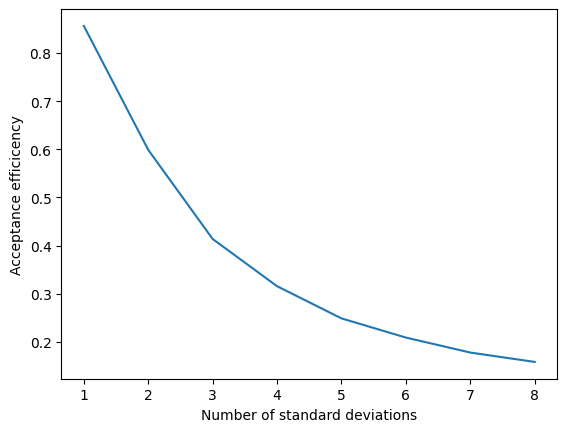

In [40]:
#compare generation efficiency across generation range size
eff=[]
for sg in range(1,9):
    gen_range=(-sg,sg)


    #function of interest
    def func(x):
        return (2*np.pi)**(-0.5) * np.exp( -x**2 /2 )

    #'normalise' for the range we're looking at
    normalization_factor, error = quad(func, *gen_range)

    def pdf(x):
        return func(x)/normalization_factor

    # get the max-value in y
    from scipy.optimize import brute
    f = lambda x: -pdf(x)
    x = brute(f, [gen_range])
    ymax = -f( x[0] )

    #algo
    def gen_accept_reject(size=1):
        res = []
        count=0
        while len(res)<size:
            a = np.random.uniform(*gen_range)
            b = np.random.uniform(0,ymax)
            y = pdf(a)
            if y > ymax:
                print('Some issue: as y larger than ymax')
            if b <= y:
                res.append(a)
            count+=1 #number of loops i.e. accept + reject
        return res, count


    num_accept=10000
    _, num_loops =gen_accept_reject(num_accept)

    eff.append(num_accept/num_loops)
    print(f"Generation efficiency for {sg} standard deviations is {num_accept/num_loops}")

stddev=[sg for sg in range(1,9)]
plt.plot(stddev,eff)
plt.xlabel("Number of standard deviations")
plt.ylabel("Acceptance efficicency")

Ways to speed up generation:

For end tails, use a smaller upper bound (e.g. with each std dev use a smaller ymax)

for high dimensions, building up the distribution will get more complicated as more randomness. Maybe fix n-1 parameters and do AR on one dimension, then repeat for discrete number of parameter values??